In [5]:
import os
# !pip install gdown
import gdown
from pathlib import Path
import zipfile
# !pip install deepface
from deepface.commons import functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

In [27]:
train_dir = "D:EmotionRecognition/CNN/train" #passing the path with training images
test_dir = "D:EmotionRecognition/CNN/test"   #passing the path with testing images


In [30]:
img_size = 48 #original size of the image

In [31]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [32]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## Train the model

In [45]:
# def loadModel(url = 'https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5'):

num_classes = 7

model = tf.keras.models.Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
home = functions.get_deepface_home()

if os.path.isfile(home+'/.deepface/weights/facial_expression_model_weights.h5') != True:
    print("facial_expression_model_weights.h5 will be downloaded...")

    output = home+'/.deepface/weights/facial_expression_model_weights.h5'
    gdown.download(url, output, quiet=False)

    """
    #google drive source downloads zip
    output = home+'/.deepface/weights/facial_expression_model_weights.zip'
    gdown.download(url, output, quiet=False)
    #unzip facial_expression_model_weights.zip
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall(home+'/.deepface/weights/')
    """

model.load_weights(home+'/.deepface/weights/facial_expression_model_weights.h5')

#     return model

In [46]:
epochs = 30
batch_size = 64

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 18, 18, 64)        36928     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_10 (Avera  (None, 7, 7, 64)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 5, 5, 128)        

In [48]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/30
359/359 [==============================] - 408s 1s/step - loss: 2.2361 - accuracy: 0.3862 - val_loss: 1.4097 - val_accuracy: 0.4846
Epoch 2/30
359/359 [==============================] - 76s 211ms/step - loss: 1.4562 - accuracy: 0.4608 - val_loss: 1.2613 - val_accuracy: 0.5300
Epoch 3/30
359/359 [==============================] - 72s 202ms/step - loss: 1.3336 - accuracy: 0.5032 - val_loss: 1.1979 - val_accuracy: 0.5489
Epoch 4/30
359/359 [==============================] - 76s 211ms/step - loss: 1.2689 - accuracy: 0.5317 - val_loss: 1.1801 - val_accuracy: 0.5635
Epoch 5/30
359/359 [==============================] - 79s 220ms/step - loss: 1.2359 - accuracy: 0.5386 - val_loss: 1.1414 - val_accuracy: 0.5810
Epoch 6/30
359/359 [==============================] - 84s 233ms/step - loss: 1.2074 - accuracy: 0.5448 - val_loss: 1.1245 - val_accuracy: 0.5859
Epoch 7/30
359/359 [==============================] - 79s 221ms/step - loss: 1.1828 - accuracy: 0.5580 - val_loss: 1.1120 - val_accu

In [4]:
import matplotlib.pyplot as plt

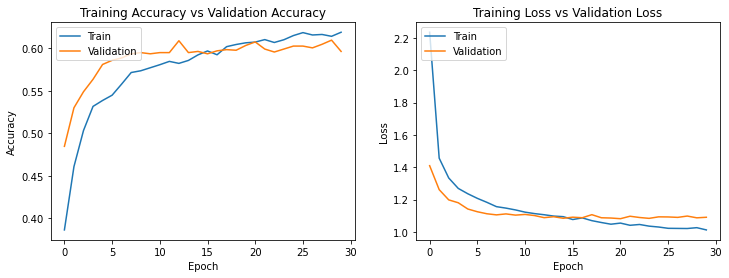

In [51]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [52]:
model.save('model_deep_face.h5')
model.save_weights('deep_face_weights.h5')

## Not work for testing see load models

In [7]:
from keras.preprocessing import image
import numpy as np
import cv2

In [10]:
model = tf.keras.models.load_model('model_deep_face.h5')
model.load_weights('deep_face_weights.h5')

NameError: name 'tf' is not defined

In [9]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()



In [1]:
# path = "D:EmotionRecognition/CNN/test/fear/PrivateTest_2918667.jpg"
path = "D:images/photo.png"
true_img = image.load_img(path)
img = image.load_img(path, grayscale = True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom =model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_img)
plt.show()


NameError: name 'image' is not defined

(48, 48, 3)


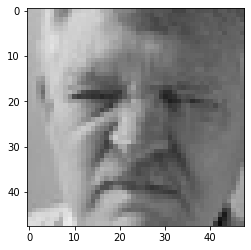

In [89]:
path
img = image.load_img("D:EmotionRecognition/CNN/train/disgust/Training_1654496.jpg",target_size = (48,48),color_mode = "grayscale")
# img = cv2.IMREAD_GRAYSCALE()
img = cv2.imread("D:EmotionRecognition/CNN/train/disgust/Training_1654496.jpg")
img = np.array(img)
# img = np.array(img.astype(np.uint8))
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

Happy


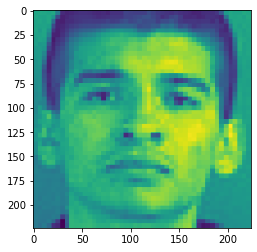

In [105]:


test_img = image.load_img("D:EmotionRecognition/CNN/test/neutral/PrivateTest_1129340.jpg",target_size = (224,224),color_mode = "grayscale")
plt.imshow(test_img)


test_img = np.expand_dims(test_img,axis = 0)
test_img = test_img.reshape(1,224,224,1)
result = model.predict(test_img)
result = list(result[0])

img_index = result.index(max(result))
print(label_dict[img_index])

In [103]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [108]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(-1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [92]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


## Test Accuracy

In [109]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 37ms/step - loss: 1.0902 - accuracy: 0.5964
final train accuracy = 63.43 , validation accuracy = 59.64
